In [256]:
'''
Author: Yuling Gu
Date: Sept 27, 2018
Description:
This program implements Feng et al. 2004, "Accessor Variety Criteria
for Chinese Word Extraction". Computational Linguistics 30(1).
Using the accessor variety criteria as a filter, we filter out terms with
less then 3 unique left and right contexts.
Usage: python3 accessorvariety.py 
unfiltered_ouput.txt foreground.tchunk.filelist
Example : python3 accessorvariety.py ../../Downloads/outfile.txt chinese_term_extraction_binaryRelease/sample.pos.filelist


#unfiltered_output.txt

foreground.tchunk.filelist



'''
"""
import os

tchunk = os.listdir('../move/output_foreground')

#tchunk = os.listdir('/Users/mac/Desktop/ngram/move/output_foreground')
#print(tchunk)




# %%
tchunk


def change_tchunk(filelist):
    newlist = []
    for i in range(len(filelist)):
        if filelist[i][-6:] == 'tchunk':
            newlist.append(filelist[i])
    return newlist


# %%
tchunk = change_tchunk(tchunk)

# %%
tchunk.sort()
tchunk
#tchunk=tchunk[:10]


# %%


# %%
def change_name(lst):
    for i in range(len(lst)):
        lst[i] = '../move/output_foreground/' + lst[i]
    return lst


change_name(tchunk)

# %%
len(tchunk)

# %%
#tchunk = tchunk[:10]
#print(tchunk)
# %%
#print(tchunk)
with open('../move/tchunkfile.txt', 'w') as f:
    for term in tchunk:
        f.write(term + '\n')

f.close()

import re
import sys



        
      




# !/usr/bin/env python3
import re
import sys

word_processed_by_av = []
word_avmorethan3=[]
def main(all_terms, conll):
    # open unfiltered file list (first argument)
    # 围棋.all_terms
    # input_file  = sys.argv[1]
    input_file = all_terms

    # list of files in CoNLL format
    # BIO data: conll
    # conll_filelist = sys.argv[2]
    conll_filelist = conll
    # print(conll_filelist)
    with open(conll_filelist, "r") as filenames:
        conll_files = filenames.readlines()

    with open(input_file, "r") as f:

        unfiltered = f.readlines()
    for term in unfiltered:
        left_context = []
        left_count = 0
        right_context = []
        right_count = 0
        term_word = term.split("\t")
        current_term = []
        for i in range(0, len(term_word) - 1):
            current_term.append(term_word[i])

        for conll_file in conll_files:
            # modify according to where the conll format files are
            conll_file = conll_file.strip("\n")
            with open(conll_file, "r") as f2:
                conll = f2.readlines()
                current_term_vec = current_term[0].split(" ")
                # print(current_term[0])
                for token in range(0, len(conll)):
                    word2_tag_BIO = conll[token].split("\t")
                    # term matched
                    if current_term[0] == word2_tag_BIO[0]:
                        left = conll[token - 1].split("\t")[0]
                        # if target word length 1
                        # AM 9/11/22
                        if (len(current_term_vec) == 1) and (len(conll) > (token + 1)):
                            right = conll[token + 1].split("\t")[0]
                        else:
                            right = conll[token + len(current_term_vec) - 1].split("\t")[0]
                        left = re.sub(r'[，。!\?\-\/\(\)\\]', '', left)
                        right = re.sub(r'[，。!\?\-\/\(\)\\"]', '', right)
                        if left != "" and left not in left_context:
                            left_context.append(left)
                        if right != "" and right not in right_context:
                            right_context.append(right)
            # check context count
            if (len(left_context) >= 3) and (len(right_context) >= 3):
                break  # if reach target, no need open another file

        if len(left_context) >= 3 and len(right_context) >= 3:
            print (term, len(left_context)+len(right_context),end = "\n")
            word_avmorethan3.append([term,len(left_context)+len(right_context)])
            #print(word_avmorethan3)


        #print(term, len(left_context), len(right_context), end="\n")
        #word_processed_by_av.append([term, len(left_context), len(right_context)])
        # print([term,,end='')
        # pass
    with open("../move/result5.txt",'w') as f:
        for item in word_avmorethan3:

            f.write("%s\n"%item)
    f.close()





#for this part, I ran it on the server

"""

'\nimport os\n\ntchunk = os.listdir(\'../move/output_foreground\')\n\n#tchunk = os.listdir(\'/Users/mac/Desktop/ngram/move/output_foreground\')\n#print(tchunk)\n\n\n\n\n# %%\ntchunk\n\n\ndef change_tchunk(filelist):\n    newlist = []\n    for i in range(len(filelist)):\n        if filelist[i][-6:] == \'tchunk\':\n            newlist.append(filelist[i])\n    return newlist\n\n\n# %%\ntchunk = change_tchunk(tchunk)\n\n# %%\ntchunk.sort()\ntchunk\n#tchunk=tchunk[:10]\n\n\n# %%\n\n\n# %%\ndef change_name(lst):\n    for i in range(len(lst)):\n        lst[i] = \'../move/output_foreground/\' + lst[i]\n    return lst\n\n\nchange_name(tchunk)\n\n# %%\nlen(tchunk)\n\n# %%\n#tchunk = tchunk[:10]\n#print(tchunk)\n# %%\n#print(tchunk)\nwith open(\'../move/tchunkfile.txt\', \'w\') as f:\n    for term in tchunk:\n        f.write(term + \'\n\')\n\nf.close()\n\nimport re\nimport sys\n\n\n\n        \n      \n\n\n\n\n# !/usr/bin/env python3\nimport re\nimport sys\n\nword_processed_by_av = []\nword_avmore

In [257]:
#main('../move/围棋.all_terms','../move/tchunkfile.txt')

In [258]:
original_lst=[]
with open("/Users/mac/Desktop/ngram/words_from_av.txt",'r') as f2:
    
    while True:
        
  
    # Get next line from file
        line = f2.readline()
        
  
    # if line is empty
    # end of file is reached
        
        if not line:break
        start=line.index('[')
        mid=line.index(',')
        end=line.index(']')
        #print(line[start+1:mid])
        
        original_lst.append([line[start+2:mid-1],line[mid+2:end]])
        

       
f2.close

original_lst


[['定段\\t33.77389335616284\\n', '14'],
 ['江流儿\\t29.827760255414745\\n', '30'],
 ['雷凌云\\t28.326954853828536\\n', '21'],
 ['云子\\t28.231464085451435\\n', '26'],
 ['雙人圍\\t25.322550451659833\\n', '12'],
 ['江流\\t17.684440134695855\\n', '28'],
 ['劫材\\t17.635460542859118\\n', '11'],
 ['对局者\\t17.23174295954707\\n', '21'],
 ['唐韋星\\t14.678756953271524\\n', '8'],
 ['方圓社\\t12.458928161513633\\n', '39'],
 ['棋鬼王\\t11.639643745607373\\n', '11'],
 ['定段赛\\t11.60481482418406\\n', '8'],
 ['轮于\\t11.235262464191884\\n', '13'],
 ['天元战\\t11.020010767046843\\n', '11'],
 ['本届\\t10.500781220979711\\n', '9'],
 ['循环圈\\t10.454596039151141\\n', '8'],
 ['預選\\t10.318280755502213\\n', '7'],
 ['齐鲁晚\\t10.083823120261227\\n', '10'],
 ['本身劫\\t10.068343599628644\\n', '8'],
 ['碁聖\\t9.480074683417948\\n', '7'],
 ['强败者\\t8.98733668268088\\n', '8'],
 ['deepmind\\t8.961162865009241\\n', '10'],
 ['御城棋\\t8.842864894524894\\n', '11'],
 ['杯冠军\\t8.576798741934919\\n', '13'],
 ['時代\\t8.489580850575923\\n', '10'],
 ['年道\\t8.488110262340

In [259]:
def change_form(lst):
    for i in range(len(lst)):
        end=lst[i][0].index('\\')
        lst[i][0]=lst[i][0][:end]
    return lst
change_form(original_lst)


[['定段', '14'],
 ['江流儿', '30'],
 ['雷凌云', '21'],
 ['云子', '26'],
 ['雙人圍', '12'],
 ['江流', '28'],
 ['劫材', '11'],
 ['对局者', '21'],
 ['唐韋星', '8'],
 ['方圓社', '39'],
 ['棋鬼王', '11'],
 ['定段赛', '8'],
 ['轮于', '13'],
 ['天元战', '11'],
 ['本届', '9'],
 ['循环圈', '8'],
 ['預選', '7'],
 ['齐鲁晚', '10'],
 ['本身劫', '8'],
 ['碁聖', '7'],
 ['强败者', '8'],
 ['deepmind', '10'],
 ['御城棋', '11'],
 ['杯冠军', '13'],
 ['時代', '10'],
 ['年道', '9'],
 ['方胜', '14'],
 ['廣島', '7'],
 ['上届', '6'],
 ['免选', '7'],
 ['挑战者', '8'],
 ['黑嘉嘉', '9'],
 ['淡路修', '7'],
 ['天台', '8'],
 ['聂卫平', '6'],
 ['任中', '9'],
 ['山城宏', '9'],
 ['等级分', '6'],
 ['贴目', '6'],
 ['臺北市', '6'],
 ['岩本', '8'],
 ['甘肃', '7'],
 ['白昕卉', '11'],
 ['張凱馨', '8'],
 ['丈和', '23'],
 ['晋级', '6'],
 ['丹朱', '8'],
 ['瀨越', '6'],
 ['楊子', '7'],
 ['因碩', '8'],
 ['刘小光', '7'],
 ['轮败者', '10'],
 ['1轮', '8'],
 ['区', '16'],
 ['男子组', '8'],
 ['劫爭', '13'],
 ['韩元', '19'],
 ['女子组', '9'],
 ['小林觉', '9'],
 ['擂台赛', '8'],
 ['赛棋手', '6'],
 ['黄河杯', '8'],
 ['女子棋', '7'],
 ['訓練', '6'],
 ['楊子萱', '6'],
 ['荒木氏', '6'],
 ['擂台', '6']

In [260]:
def words_without_labels(lst):
    res=''
    for i in range(len(lst)):
        res+=lst[i][0]
        res+='\n'
    return res



In [261]:
writetoinput=words_without_labels(original_lst)

In [262]:
with open('/Users/mac/Desktop/ngram/brandeisinput/go_words.txt','w') as f:
    f.writelines(writetoinput)
f.close()



In [263]:
wordlst_brandeis=[]
with open("/Users/mac/Desktop/ngram/brandeisoutput/go_words.txt") as f2:
    for line in f2:

        wordlst_brandeis.append(line.strip('\n').split())
f2.close()
#wordlst_brandeis



In [264]:
wordlst_brandeis

[['定段_NN'],
 ['江流儿_NN'],
 ['雷凌云_NN'],
 ['云子_NN'],
 ['雙人圍_NN'],
 ['江流_NN'],
 ['劫材_NN'],
 ['对_P', '局者_NN'],
 ['唐韋星_NN'],
 ['方圓社_NN'],
 ['棋鬼王_NN'],
 ['定_OD', '段_M', '赛_NN'],
 ['轮于_P'],
 ['天元战_NN'],
 ['本_DT', '届_NN'],
 ['循环圈_NN'],
 ['預選_NN'],
 ['齐鲁晚_Err'],
 ['本_DT', '身劫_NN'],
 ['碁聖_NN'],
 ['强败者_NN'],
 ['deepmind_NN'],
 ['御城棋_NN'],
 ['杯冠军_NN'],
 ['時代_NN'],
 ['年道_NN'],
 ['方胜_NN'],
 ['廣島_NN'],
 ['上_JJ', '届_NN'],
 ['免选_NN'],
 ['挑战者_NN'],
 ['黑嘉嘉_NN'],
 ['淡路修_NN'],
 ['天台_NN'],
 ['聂卫_NN', '平_VA'],
 ['任_NN', '中_LC'],
 ['山城宏_NN'],
 ['等级_JJ', '分_NN'],
 ['贴目_NN'],
 ['臺北市_NN'],
 ['岩本_NN'],
 ['甘肃_NN'],
 ['白昕卉_NR'],
 ['張凱馨_NN'],
 ['丈_NN', '和_CC'],
 ['晋级_NN'],
 ['丹朱_NN'],
 ['瀨越_NN'],
 ['楊子_NN'],
 ['因_P', '碩_NN'],
 ['刘小光_AD'],
 ['轮败者_NN'],
 ['1轮_NN'],
 ['区_NN'],
 ['男子组_NN'],
 ['劫爭_NN'],
 ['韩元_NN'],
 ['女子组_NN'],
 ['小_JJ', '林觉_NN'],
 ['擂台赛_NN'],
 ['赛棋手_NN'],
 ['黄河杯_NN'],
 ['女子棋_NN'],
 ['訓練_NN'],
 ['楊子萱_NN'],
 ['荒木氏_NN'],
 ['擂台_NN'],
 ['决赛_CS', '第_Err'],
 ['强败_NN', '者获_NN'],
 ['專案_NN'],
 ['俘子_NN'],
 ['柯潔_NN'

In [265]:
reslst=[]
for i in range(len(wordlst_brandeis)):
    each_word=[]
    
    for j in range(len(wordlst_brandeis[i])):
        res=wordlst_brandeis[i][j].split('_')
        each_word.append(res)
    reslst.append(each_word)
reslst

[[['定段', 'NN']],
 [['江流儿', 'NN']],
 [['雷凌云', 'NN']],
 [['云子', 'NN']],
 [['雙人圍', 'NN']],
 [['江流', 'NN']],
 [['劫材', 'NN']],
 [['对', 'P'], ['局者', 'NN']],
 [['唐韋星', 'NN']],
 [['方圓社', 'NN']],
 [['棋鬼王', 'NN']],
 [['定', 'OD'], ['段', 'M'], ['赛', 'NN']],
 [['轮于', 'P']],
 [['天元战', 'NN']],
 [['本', 'DT'], ['届', 'NN']],
 [['循环圈', 'NN']],
 [['預選', 'NN']],
 [['齐鲁晚', 'Err']],
 [['本', 'DT'], ['身劫', 'NN']],
 [['碁聖', 'NN']],
 [['强败者', 'NN']],
 [['deepmind', 'NN']],
 [['御城棋', 'NN']],
 [['杯冠军', 'NN']],
 [['時代', 'NN']],
 [['年道', 'NN']],
 [['方胜', 'NN']],
 [['廣島', 'NN']],
 [['上', 'JJ'], ['届', 'NN']],
 [['免选', 'NN']],
 [['挑战者', 'NN']],
 [['黑嘉嘉', 'NN']],
 [['淡路修', 'NN']],
 [['天台', 'NN']],
 [['聂卫', 'NN'], ['平', 'VA']],
 [['任', 'NN'], ['中', 'LC']],
 [['山城宏', 'NN']],
 [['等级', 'JJ'], ['分', 'NN']],
 [['贴目', 'NN']],
 [['臺北市', 'NN']],
 [['岩本', 'NN']],
 [['甘肃', 'NN']],
 [['白昕卉', 'NR']],
 [['張凱馨', 'NN']],
 [['丈', 'NN'], ['和', 'CC']],
 [['晋级', 'NN']],
 [['丹朱', 'NN']],
 [['瀨越', 'NN']],
 [['楊子', 'NN']],
 [['因', 'P'], ['碩',

In [266]:
def change_reslst(lst):
    new_lst=[]
    for i in range(len(lst)):
        if lst[i]!=[]:
            new_lst.append(lst[i])
    return new_lst
reslst=change_reslst(reslst)

In [267]:
noun_lst=['NN','NT','NR']
#new_score_lst=[]
def grade_term(lst):
    new_score_lst=[]
    for i in range(len(lst)):
        original_score=int(original_lst[i][1])
        #print(original_score)
        new_score=0
        for j in range(len(lst[i])):
            if lst[i][j][-1] in noun_lst:
                #print(lst[i][j][1])
                new_score+=1
            if lst[i][j][-1] not in noun_lst:
                new_score-=0.25
        #print(new_score)
        #combined_score=original_score*(new_score+1)
        combined_score=(new_score+1)
        new_score_lst.append(combined_score)
    return new_score_lst
new_score_lst=grade_term(reslst)


                


In [ ]:
# NN-
# NN 

In [268]:
new_score_lst

[2,
 2,
 2,
 2,
 2,
 2,
 2,
 1.75,
 2,
 2,
 2,
 1.5,
 0.75,
 2,
 1.75,
 2,
 2,
 0.75,
 1.75,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1.75,
 2,
 2,
 2,
 2,
 2,
 1.75,
 1.75,
 2,
 1.75,
 2,
 2,
 2,
 2,
 2,
 2,
 1.75,
 2,
 2,
 2,
 2,
 1.75,
 0.75,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1.75,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 0.5,
 3,
 2,
 2,
 2,
 2,
 1.75,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1.75,
 2,
 2,
 2,
 2,
 1.75,
 2,
 2,
 2,
 2,
 2,
 1.75,
 2,
 1.75,
 2.75,
 2,
 2,
 2,
 2,
 2,
 2,
 1.75,
 2,
 2,
 2,
 2,
 2,
 0.75,
 2,
 2,
 2,
 2,
 2,
 0.75,
 2,
 3,
 2,
 2,
 2,
 2,
 1.75,
 2,
 2,
 2,
 2,
 2,
 0.75,
 2,
 1.75,
 1.75,
 1.75,
 0.75,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 0.75,
 0.5,
 2,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 2,
 2,
 1.5,
 2,
 1.75,
 2,
 3,
 2,
 2,
 2,
 2,
 2,
 0.75,
 1.75,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1.75,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 0.75,
 2,
 2,
 2,
 2,
 2,
 0.5,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,


In [269]:
wordonly_lst=writetoinput.split('\n')[:-1]
from zhconv import convert
def traditional_to_simple(lst):
    for i in range(len(lst)):
        lst[i]=convert(lst[i],'zh-cn')

traditional_to_simple(wordonly_lst)

#convert(lst[i][0],'zh-cn')

In [270]:
def change_wordlst(wordonly):
    newlst=[]
    for i in range(len(wordonly)):
        if wordonly[i]!='':
            newlst.append(wordonly[i])
    return newlst
wordonly_lst=change_wordlst(wordonly_lst)
#wordonly_lst[1000:]

In [271]:
len(writetoinput.split('\n'))
len(new_score_lst)




1155

In [272]:
combined_lst=[]
for i in range(len(wordonly_lst)):
    combined_lst.append([wordonly_lst[i],new_score_lst[i]])
combined_lst

#combined_lst.sort(key=lambda x:x[-1] ,reverse=True)
combined_lst

[['定段', 2],
 ['江流儿', 2],
 ['雷凌云', 2],
 ['云子', 2],
 ['双人围', 2],
 ['江流', 2],
 ['劫材', 2],
 ['对局者', 1.75],
 ['唐韦星', 2],
 ['方圆社', 2],
 ['棋鬼王', 2],
 ['定段赛', 1.5],
 ['轮于', 0.75],
 ['天元战', 2],
 ['本届', 1.75],
 ['循环圈', 2],
 ['预选', 2],
 ['齐鲁晚', 0.75],
 ['本身劫', 1.75],
 ['碁圣', 2],
 ['强败者', 2],
 ['deepmind', 2],
 ['御城棋', 2],
 ['杯冠军', 2],
 ['时代', 2],
 ['年道', 2],
 ['方胜', 2],
 ['广岛', 2],
 ['上届', 1.75],
 ['免选', 2],
 ['挑战者', 2],
 ['黑嘉嘉', 2],
 ['淡路修', 2],
 ['天台', 2],
 ['聂卫平', 1.75],
 ['任中', 1.75],
 ['山城宏', 2],
 ['等级分', 1.75],
 ['贴目', 2],
 ['台北市', 2],
 ['岩本', 2],
 ['甘肃', 2],
 ['白昕卉', 2],
 ['张凯馨', 2],
 ['丈和', 1.75],
 ['晋级', 2],
 ['丹朱', 2],
 ['濑越', 2],
 ['杨子', 2],
 ['因硕', 1.75],
 ['刘小光', 0.75],
 ['轮败者', 2],
 ['1轮', 2],
 ['区', 2],
 ['男子组', 2],
 ['劫争', 2],
 ['韩元', 2],
 ['女子组', 2],
 ['小林觉', 1.75],
 ['擂台赛', 2],
 ['赛棋手', 2],
 ['黄河杯', 2],
 ['女子棋', 2],
 ['训练', 2],
 ['杨子萱', 2],
 ['荒木氏', 2],
 ['擂台', 2],
 ['决赛第', 0.5],
 ['强败者获', 3],
 ['专案', 2],
 ['俘子', 2],
 ['柯洁', 2],
 ['分至', 2],
 ['本战', 1.75],
 ['过惕生', 2],
 ['联棋', 2]

In [273]:
#remove space in original lst
def remove_emptystr(original_lst):
    new_lst=[]

    for i in range(len(original_lst)):
        if original_lst[i][0]!='':
            new_lst.append(original_lst[i])
    return new_lst
original_lst=remove_emptystr(original_lst)


In [274]:
print(len(original_lst),len(combined_lst))

1155 1155


In [275]:
for i in range(len(original_lst)):
   original_lst[i].append(combined_lst[i][1])
original_lst

[['定段', '14', 2],
 ['江流儿', '30', 2],
 ['雷凌云', '21', 2],
 ['云子', '26', 2],
 ['雙人圍', '12', 2],
 ['江流', '28', 2],
 ['劫材', '11', 2],
 ['对局者', '21', 1.75],
 ['唐韋星', '8', 2],
 ['方圓社', '39', 2],
 ['棋鬼王', '11', 2],
 ['定段赛', '8', 1.5],
 ['轮于', '13', 0.75],
 ['天元战', '11', 2],
 ['本届', '9', 1.75],
 ['循环圈', '8', 2],
 ['預選', '7', 2],
 ['齐鲁晚', '10', 0.75],
 ['本身劫', '8', 1.75],
 ['碁聖', '7', 2],
 ['强败者', '8', 2],
 ['deepmind', '10', 2],
 ['御城棋', '11', 2],
 ['杯冠军', '13', 2],
 ['時代', '10', 2],
 ['年道', '9', 2],
 ['方胜', '14', 2],
 ['廣島', '7', 2],
 ['上届', '6', 1.75],
 ['免选', '7', 2],
 ['挑战者', '8', 2],
 ['黑嘉嘉', '9', 2],
 ['淡路修', '7', 2],
 ['天台', '8', 2],
 ['聂卫平', '6', 1.75],
 ['任中', '9', 1.75],
 ['山城宏', '9', 2],
 ['等级分', '6', 1.75],
 ['贴目', '6', 2],
 ['臺北市', '6', 2],
 ['岩本', '8', 2],
 ['甘肃', '7', 2],
 ['白昕卉', '11', 2],
 ['張凱馨', '8', 2],
 ['丈和', '23', 1.75],
 ['晋级', '6', 2],
 ['丹朱', '8', 2],
 ['瀨越', '6', 2],
 ['楊子', '7', 2],
 ['因碩', '8', 1.75],
 ['刘小光', '7', 0.75],
 ['轮败者', '10', 2],
 ['1轮', '8', 2],
 ['区', '

In [276]:
traininglst=[]
for i in range(len(original_lst)):
    traininglst.append([int(original_lst[i][1]),original_lst[i][2]])
traininglst

[[14, 2],
 [30, 2],
 [21, 2],
 [26, 2],
 [12, 2],
 [28, 2],
 [11, 2],
 [21, 1.75],
 [8, 2],
 [39, 2],
 [11, 2],
 [8, 1.5],
 [13, 0.75],
 [11, 2],
 [9, 1.75],
 [8, 2],
 [7, 2],
 [10, 0.75],
 [8, 1.75],
 [7, 2],
 [8, 2],
 [10, 2],
 [11, 2],
 [13, 2],
 [10, 2],
 [9, 2],
 [14, 2],
 [7, 2],
 [6, 1.75],
 [7, 2],
 [8, 2],
 [9, 2],
 [7, 2],
 [8, 2],
 [6, 1.75],
 [9, 1.75],
 [9, 2],
 [6, 1.75],
 [6, 2],
 [6, 2],
 [8, 2],
 [7, 2],
 [11, 2],
 [8, 2],
 [23, 1.75],
 [6, 2],
 [8, 2],
 [6, 2],
 [7, 2],
 [8, 1.75],
 [7, 0.75],
 [10, 2],
 [8, 2],
 [16, 2],
 [8, 2],
 [13, 2],
 [19, 2],
 [9, 2],
 [9, 1.75],
 [8, 2],
 [6, 2],
 [8, 2],
 [7, 2],
 [6, 2],
 [6, 2],
 [6, 2],
 [6, 2],
 [6, 0.5],
 [6, 3],
 [6, 2],
 [6, 2],
 [6, 2],
 [6, 2],
 [6, 1.75],
 [7, 2],
 [11, 2],
 [7, 2],
 [9, 2],
 [7, 2],
 [7, 2],
 [10, 2],
 [6, 1.75],
 [12, 2],
 [6, 2],
 [9, 2],
 [7, 2],
 [6, 1.75],
 [7, 2],
 [6, 2],
 [7, 2],
 [8, 2],
 [13, 2],
 [6, 1.75],
 [9, 2],
 [7, 1.75],
 [7, 2.75],
 [12, 2],
 [7, 2],
 [13, 2],
 [8, 2],
 [6, 2],


In [277]:

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


#X_drug10 = dmso.iloc[:, 2:240].values

#X_drug10 = StandardScaler().fit_transform(X_drug)

pca_words = PCA(n_components=2)
components = pca_words.fit_transform(traininglst)
components

array([[ 6.36316794, -0.13810228],
       [22.36305791, -0.19744169],
       [13.3631198 , -0.16406327],
       ...,
       [ 0.36320921, -0.11585   ],
       [ 2.36319545, -0.12326743],
       [ 3.36318858, -0.12697614]])

In [278]:
term_class=['terminologies']*500+['not terminologies']*655

In [279]:
len(components)

1155

In [280]:
import copy
import matplotlib.pyplot as plt
X=copy.deepcopy(traininglst)
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

In [281]:
len(y_kmeans)

1155

In [282]:
import numpy as np
X=np.asarray(X)

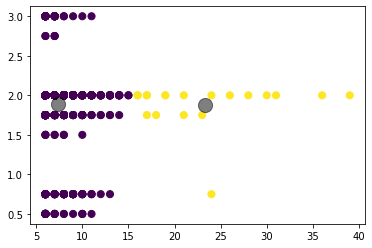

In [283]:
plt.scatter(X[:,0], X[ :,1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [284]:
y_kmeans=np.ndarray.tolist(y_kmeans)
def change_0_1_to_bool(lst):
    newlst=[]
    for i in range(len(lst)):
        if lst[i]==0:
            newlst.append(False)
        else:
            newlst.append(True)
    return newlst
y_kmeans=change_0_1_to_bool(y_kmeans)

In [285]:
for i in range(len(original_lst)):
    original_lst[i].append(y_kmeans[i])
    original_lst[i][1]=int(original_lst[i][1])
original_lst

[['定段', 14, 2, False],
 ['江流儿', 30, 2, True],
 ['雷凌云', 21, 2, True],
 ['云子', 26, 2, True],
 ['雙人圍', 12, 2, False],
 ['江流', 28, 2, True],
 ['劫材', 11, 2, False],
 ['对局者', 21, 1.75, True],
 ['唐韋星', 8, 2, False],
 ['方圓社', 39, 2, True],
 ['棋鬼王', 11, 2, False],
 ['定段赛', 8, 1.5, False],
 ['轮于', 13, 0.75, False],
 ['天元战', 11, 2, False],
 ['本届', 9, 1.75, False],
 ['循环圈', 8, 2, False],
 ['預選', 7, 2, False],
 ['齐鲁晚', 10, 0.75, False],
 ['本身劫', 8, 1.75, False],
 ['碁聖', 7, 2, False],
 ['强败者', 8, 2, False],
 ['deepmind', 10, 2, False],
 ['御城棋', 11, 2, False],
 ['杯冠军', 13, 2, False],
 ['時代', 10, 2, False],
 ['年道', 9, 2, False],
 ['方胜', 14, 2, False],
 ['廣島', 7, 2, False],
 ['上届', 6, 1.75, False],
 ['免选', 7, 2, False],
 ['挑战者', 8, 2, False],
 ['黑嘉嘉', 9, 2, False],
 ['淡路修', 7, 2, False],
 ['天台', 8, 2, False],
 ['聂卫平', 6, 1.75, False],
 ['任中', 9, 1.75, False],
 ['山城宏', 9, 2, False],
 ['等级分', 6, 1.75, False],
 ['贴目', 6, 2, False],
 ['臺北市', 6, 2, False],
 ['岩本', 8, 2, False],
 ['甘肃', 7, 2, False],
 ['白昕卉'

In [290]:
termlst=[]
for i in range(len(original_lst)):
    if original_lst[i][2]>=2:
        termlst.append(original_lst[i])
termlst

[['定段', 14, 2, False],
 ['江流儿', 30, 2, True],
 ['雷凌云', 21, 2, True],
 ['云子', 26, 2, True],
 ['雙人圍', 12, 2, False],
 ['江流', 28, 2, True],
 ['劫材', 11, 2, False],
 ['唐韋星', 8, 2, False],
 ['方圓社', 39, 2, True],
 ['棋鬼王', 11, 2, False],
 ['天元战', 11, 2, False],
 ['循环圈', 8, 2, False],
 ['預選', 7, 2, False],
 ['碁聖', 7, 2, False],
 ['强败者', 8, 2, False],
 ['deepmind', 10, 2, False],
 ['御城棋', 11, 2, False],
 ['杯冠军', 13, 2, False],
 ['時代', 10, 2, False],
 ['年道', 9, 2, False],
 ['方胜', 14, 2, False],
 ['廣島', 7, 2, False],
 ['免选', 7, 2, False],
 ['挑战者', 8, 2, False],
 ['黑嘉嘉', 9, 2, False],
 ['淡路修', 7, 2, False],
 ['天台', 8, 2, False],
 ['山城宏', 9, 2, False],
 ['贴目', 6, 2, False],
 ['臺北市', 6, 2, False],
 ['岩本', 8, 2, False],
 ['甘肃', 7, 2, False],
 ['白昕卉', 11, 2, False],
 ['張凱馨', 8, 2, False],
 ['晋级', 6, 2, False],
 ['丹朱', 8, 2, False],
 ['瀨越', 6, 2, False],
 ['楊子', 7, 2, False],
 ['轮败者', 10, 2, False],
 ['1轮', 8, 2, False],
 ['区', 16, 2, True],
 ['男子组', 8, 2, False],
 ['劫爭', 13, 2, False],
 ['韩元', 19, 2, T

In [286]:
import plotly.express as px
fig = px.scatter(traininglst, x=0, y=1, color=term_class)
fig.show()

In [287]:
def remove_space(lst):
    new_lst=[]
    for i in range(len(lst)):
        if lst[i][0]!='':
            new_lst.append(lst[i])
    return new_lst
combined_lst=remove_space(combined_lst)
len(combined_lst)



1155

In [288]:
all_word_score=accuracy(word_only_all_words)
#print(all_word_score)

NameError: name 'accuracy' is not defined

In [ ]:
print(all_word_score)

0.2571428571428571


In [ ]:
reslst

[[['方圓社', 'NN']],
 [['江流儿', 'NN']],
 [['雷凌云', 'NN']],
 [['江流', 'NN']],
 [['云子', 'NN']],
 [['小', 'JJ'], ['林光', 'NN']],
 [['元人', 'NN']],
 [['对', 'P'], ['局者', 'NN']],
 [['赛冠军', 'NN']],
 [['韩元', 'NN']],
 [['小光', 'NN']],
 [['组', 'NN']],
 [['棋盘', 'NN']],
 [['棋形', 'NN']],
 [['棋鬼王', 'NN']],
 [['御城棋', 'NN']],
 [['王戰', 'NN']],
 [['桐山杯', 'NN']],
 [['樊麾', 'NN']],
 [['区', 'NN']],
 [['方圓', 'NN']],
 [['之一', 'NT']],
 [['方棋子', 'NN']],
 [['国棋院', 'NN']],
 [['海峰棋', 'NN'], ['院', 'NN']],
 [['定段', 'NN']],
 [['方胜', 'NN']],
 [['制度', 'NN']],
 [['中国', 'NR']],
 [['女子', 'NN']],
 [['山城宏', 'NN']],
 [['黄龙士', 'NN']],
 [['杯冠军', 'NN']],
 [['棋圣', 'NN']],
 [['名单', 'NN']],
 [['陈祖德', 'NN']],
 [['参赛', 'NN']],
 [['黑棋', 'NN']],
 [['模樣', 'NN']],
 [['雙人圍', 'NN']],
 [['颗子', 'NN']],
 [['妖刀', 'NN']],
 [['中华', 'NR'], ['台北', 'NN']],
 [['王晨星', 'NN']],
 [['項目', 'NN']],
 [['提子', 'NN']],
 [['卫平', 'NN']],
 [['出线', 'NN']],
 [['职业棋', 'NN']],
 [['棋協會', 'NN']],
 [['决赛', 'NT']],
 [['台灣棋', 'NN']],
 [['後來', 'NR']],
 [['如果', 'CS']],
 [['本', 'DT']

In [ ]:
len(reslst)
def remove_space_fortag(lst):
    newlst=[]
    for i in range(len(reslst)):
        if reslst[i]!=[]:
            newlst.append(reslst[i])
    return newlst
reslst=remove_space_fortag(reslst)
len(reslst)


1155

In [ ]:
filtered_lst=[]
ruled_out=[]
filtered_lst_withtag=[]
ruled_out_withtag=[]
for i in range(len(reslst)):
    condition=True
    for j in range(len(reslst[i])):
        if reslst[i][j][1] not in noun_lst:
            condition=False
    
    if condition:
        filtered_lst.append(combined_lst[i])
        filtered_lst_withtag.append(reslst[i])
    else:
        ruled_out.append(combined_lst[i])
        ruled_out_withtag.append(reslst[i])


In [ ]:
filtered_lst

[['方圆社', 78],
 ['组', 72],
 ['之一', 62],
 ['江流儿', 60],
 ['江流', 56],
 ['云子', 52],
 ['丈和', 46],
 ['雷凌云', 42],
 ['对局者', 42],
 ['秀和', 42],
 ['韩元', 38],
 ['小光', 38],
 ['通算', 36],
 ['小林光', 34],
 ['棋盘', 34],
 ['白昕卉', 33],
 ['联棋', 33],
 ['方圆', 32],
 ['时代', 30],
 ['俞俐均', 30],
 ['技术', 30],
 ['其中', 30],
 ['定段', 28],
 ['方胜', 28],
 ['制度', 28],
 ['赛冠军', 28],
 ['中国', 28],
 ['开始', 28],
 ['女子', 28],
 ['视台', 27],
 ['读秒', 27],
 ['或者', 27],
 ['特别', 27],
 ['轮于', 26],
 ['杯冠军', 26],
 ['劫争', 26],
 ['棋圣', 26],
 ['组织', 26],
 ['预选', 26],
 ['开发', 26],
 ['周睿', 26],
 ['陈祖德', 26],
 ['停办', 26],
 ['参赛', 26],
 ['模样', 26],
 ['本因', 26],
 ['双人围', 24],
 ['颗子', 24],
 ['妖刀', 24],
 ['目外', 24],
 ['项目', 24],
 ['对弈', 24],
 ['出线', 24],
 ['后来', 24],
 ['如果', 24],
 ['本赛', 24],
 ['劫材', 22],
 ['天元战', 22],
 ['御城棋', 22],
 ['欧洲', 22],
 ['连胜', 22],
 ['其它', 22],
 ['对抗赛', 22],
 ['桐山杯', 22],
 ['国流', 22],
 ['应用', 22],
 ['创办', 22],
 ['樊麾', 22],
 ['弟子', 22],
 ['才能', 22],
 ['比目法', 22],
 ['届起', 22],
 ['击败', 22],
 ['初段', 22],
 ['年代', 22],
 ['首轮', 22

In [ ]:
filtered_lst_withtag

[[['方圓社', 'NN']],
 [['江流儿', 'NN']],
 [['雷凌云', 'NN']],
 [['江流', 'NN']],
 [['云子', 'NN']],
 [['元人', 'NN']],
 [['赛冠军', 'NN']],
 [['韩元', 'NN']],
 [['小光', 'NN']],
 [['组', 'NN']],
 [['棋盘', 'NN']],
 [['棋形', 'NN']],
 [['棋鬼王', 'NN']],
 [['御城棋', 'NN']],
 [['王戰', 'NN']],
 [['桐山杯', 'NN']],
 [['樊麾', 'NN']],
 [['区', 'NN']],
 [['方圓', 'NN']],
 [['之一', 'NT']],
 [['方棋子', 'NN']],
 [['国棋院', 'NN']],
 [['海峰棋', 'NN'], ['院', 'NN']],
 [['定段', 'NN']],
 [['方胜', 'NN']],
 [['制度', 'NN']],
 [['中国', 'NR']],
 [['女子', 'NN']],
 [['山城宏', 'NN']],
 [['黄龙士', 'NN']],
 [['杯冠军', 'NN']],
 [['棋圣', 'NN']],
 [['名单', 'NN']],
 [['陈祖德', 'NN']],
 [['参赛', 'NN']],
 [['黑棋', 'NN']],
 [['模樣', 'NN']],
 [['雙人圍', 'NN']],
 [['颗子', 'NN']],
 [['妖刀', 'NN']],
 [['中华', 'NR'], ['台北', 'NN']],
 [['王晨星', 'NN']],
 [['項目', 'NN']],
 [['提子', 'NN']],
 [['卫平', 'NN']],
 [['出线', 'NN']],
 [['职业棋', 'NN']],
 [['棋協會', 'NN']],
 [['决赛', 'NT']],
 [['台灣棋', 'NN']],
 [['後來', 'NR']],
 [['劫材', 'NN']],
 [['天元战', 'NN']],
 [['白昕卉', 'NR']],
 [['歐洲', 'NN']],
 [['连胜', 'NN']],
 [

In [ ]:
len(filtered_lst)
#len(ruled_out)

897

In [ ]:
len(ruled_out)

258

In [ ]:
import wikipedia
wikipedia.set_lang("zh")
#words=wikipedia.search("围棋",results=1000)
def accuracy(filtered_word):
    
    counter=0
    for i in range(len(filtered_word)):
        if convert(wikipedia.search(filtered_word[i][0],results=1)[0],'zh-cn')==filtered_word[i][0]:
            print(filtered_word[i][0])
            counter+=1
    return counter/len(filtered_word)



# random sample

In [ ]:
import random

random_selected=random.sample(filtered_lst,100)
random_selected

[['制度', 28],
 ['同样', 12],
 ['家家督', 12],
 ['传统', 12],
 ['是围棋', 16],
 ['预赛', 12],
 ['年第', 20],
 ['日本围', 14],
 ['酒店', 12],
 ['消劫', 18],
 ['棋以', 12],
 ['佐为', 20],
 ['世乭', 12],
 ['如果', 24],
 ['道策', 18],
 ['公开赛', 16],
 ['位棋手', 14],
 ['段胜', 12],
 ['游戏', 12],
 ['锦标赛', 12],
 ['通算', 36],
 ['当时', 12],
 ['采用', 12],
 ['分至', 12],
 ['江铸久', 16],
 ['陶欣然', 14],
 ['相邻', 12],
 ['芈昱廷', 12],
 ['读秒的', 12],
 ['达到', 10],
 ['家督', 12],
 ['网格', 16],
 ['成为', 20],
 ['女子组', 18],
 ['周泓余', 12],
 ['对弈', 24],
 ['王晨星', 16],
 ['国队', 18],
 ['可能', 20],
 ['日本棋', 6],
 ['方一', 12],
 ['中盘', 10],
 ['网选', 16],
 ['各地', 7],
 ['定段赛', 16],
 ['元晟溱', 18],
 ['擂台赛', 16],
 ['级分', 16],
 ['国围棋', 12],
 ['赞助', 15],
 ['已经', 12],
 ['姜堰', 14],
 ['德川', 12],
 ['本战', 18],
 ['同时', 16],
 ['赞助商', 12],
 ['下午', 18],
 ['韩国棋院', 12],
 ['职业棋手', 14],
 ['游戏', 18],
 ['选手', 16],
 ['团体赛', 14],
 ['日本围', 14],
 ['国际象棋', 12],
 ['定石', 12],
 ['本学', 12],
 ['原子', 12],
 ['名人战', 12],
 ['认为', 18],
 ['数子', 18],
 ['月', 14],
 ['台湾', 18],
 ['深入', 16],
 ['应用', 22],
 ['新布局', 12],

In [ ]:
random1=copy.deepcopy(random1)
big_random=[]
big_random.append()

In [ ]:
accuracy_of_ruled_out=accuracy(ruled_out)

卫平
王战
先手
吴清源
圣战
交流
定式
柯洁
出场
互联网
区
弈秋
复杂
将棋
位置
优胜
杨子
单位
网站
政府
中部
宇宙流
元和
资源
高目
星位
三三
张璇
木谷实
常昊
罗洗河
财团法人
曹薰铉
井山裕太
党毅飞
收官
亚洲
职业
循环
俱乐部
占角
世代
裁判
卡尔
循环
连接
东京
外卡
分数
点
香港
平面
扇兴杯
数子法
工程
读卖新闻
计算
郭闻潮
许嘉阳
少年
曹大元
严欢
胡耀宇
古灵益
李喆
安冬旭
奥林匹亚
象棋
金志锡
关西
蔡竞
王磊
姜东润
陈耀烨
芈昱廷
古力
朴永训
改名
柁嘉熹
世本
吴清源
台湾棋院


In [ ]:
accuracy_of_filtered=accuracy(filtered_lst)

方圆社
组
江流
云子
小光
方圆
时代
俞俐均
技术
制度
中国
读秒
棋圣
组织
陈祖德
模样
目外
项目
天元战
御城棋
欧洲
樊麾
比目法
年代
围棋
中方
曾经
计数
版本
棋谱
腾讯
联盟
赞助
关西
中日
叫吃
小目
时间
昭和
之后
日本
世界
黑嘉嘉
山城宏
小林觉
黄龙士
外势
学习
胜率
理光
王座战
碁圣战
衢州市
下午
日
崔哲瀚
软件
体育
运算
圣战
提升
历史
包围
世纪
存在
辜梓豪
陈浩
网络
棋圣战
网络
游戏
元晟溱
中央
中国
台湾
唐韦星
天台
丹朱
黄河杯
中环杯
中华台北
棋圣
王晨星
成绩
黑龙江
背景
申旻埈
王积薪
数据
基金会
元老
贴目
工作
利益
马晓春
局
小时
崔精
李昌镐
算法
江铸久
发展
宋容慧
让子
唐奕
李轩豪
唐韦星
围棋
赞助
广岛
刘小光
过惕生
桥本
天元
邱峻
谢依旻
赵南哲
玩家
名誉
霸王
海峰
排名
黄龙
名人战
分析
传说
参数
1月1日
距离
周俊勋
月
种子
范西屏
周俊
周俊勋
罗玄
方捷
林海峰
名誉
小时
丁浩
长考
继承
朴文垚
林家
战斗
关西棋院
奖金
公司
大学
范廷钰
黑白
选择
坂田
论文
过程
朴廷桓
陶欣然
俞斌
刘星
奖金
刘昌赫
世纪
江维杰
范廷钰
国际
聂卫平
等级分
贴目
台北市
训练
擂台
绝艺
新布石
李昌镐
江户
开局
分先
芈昱廷
白子
棋经
人类
个人
亚艺杯
关东
团队
数学
服务器
赵晨宇
假眼活
朴鋕恩
酒店
模仿
团队
中学
系列
李东勋
预赛
富士
大小
世袭
东京
德川
手割
台北
女流
直线
名人战
丰田杯
3月4日
丁烈
加藤
服务器
无锡市
顾水如
程式
电视
家督
协会
男女
征子
原子
连接
范胤
赵治勋
决定
内容
日本棋院
国际
国际象棋
对手
韩国棋院
杭州市
变化
传统
城市
地区
安井家
分钟
周泓余
人民
成绩
孔杰
游戏
睦镇硕
彭荃
价值
黄奕中
范蕴若
申真谞
檀啸
周睿羊
时间
杨鼎新
国家
棋王
柯洁
连笑
谢赫
时越
发展
职业
本因坊
董彦
黑子
浙江省
等级
李世乭
手合
中环
陈耀烨
棋局
棋圣战
野狐
李康
儿子
胜率
丁伟
研究
周鹤洋


In [ ]:
accuracy_of_filtered

0.31215161649944256

In [ ]:
accuracy_of_ruled_out

0.3178294573643411

In [ ]:
filtered_lst_withtag

[[['方圓社', 'NN']],
 [['江流儿', 'NN']],
 [['雷凌云', 'NN']],
 [['江流', 'NN']],
 [['云子', 'NN']],
 [['元人', 'NN']],
 [['赛冠军', 'NN']],
 [['韩元', 'NN']],
 [['小光', 'NN']],
 [['组', 'NN']],
 [['棋盘', 'NN']],
 [['棋形', 'NN']],
 [['棋鬼王', 'NN']],
 [['御城棋', 'NN']],
 [['王戰', 'NN']],
 [['桐山杯', 'NN']],
 [['樊麾', 'NN']],
 [['区', 'NN']],
 [['方圓', 'NN']],
 [['之一', 'NT']],
 [['方棋子', 'NN']],
 [['国棋院', 'NN']],
 [['海峰棋', 'NN'], ['院', 'NN']],
 [['定段', 'NN']],
 [['方胜', 'NN']],
 [['制度', 'NN']],
 [['中国', 'NR']],
 [['女子', 'NN']],
 [['山城宏', 'NN']],
 [['黄龙士', 'NN']],
 [['杯冠军', 'NN']],
 [['棋圣', 'NN']],
 [['名单', 'NN']],
 [['陈祖德', 'NN']],
 [['参赛', 'NN']],
 [['黑棋', 'NN']],
 [['模樣', 'NN']],
 [['雙人圍', 'NN']],
 [['颗子', 'NN']],
 [['妖刀', 'NN']],
 [['中华', 'NR'], ['台北', 'NN']],
 [['王晨星', 'NN']],
 [['項目', 'NN']],
 [['提子', 'NN']],
 [['卫平', 'NN']],
 [['出线', 'NN']],
 [['职业棋', 'NN']],
 [['棋協會', 'NN']],
 [['决赛', 'NT']],
 [['台灣棋', 'NN']],
 [['後來', 'NR']],
 [['劫材', 'NN']],
 [['天元战', 'NN']],
 [['白昕卉', 'NR']],
 [['歐洲', 'NN']],
 [['连胜', 'NN']],
 [

In [ ]:
extra=[]
for i in range(len(toshow2)):
    if toshow2[i] in ['n n ',
 'n ',
 'v n ',
 'e n g n ',
 'n v n ']:
        extra.append(ruled_out_word[i])

"""['n n ',
 'n ',
 'n v ',
 'v n ',
 'e n g n ',
 'n v n ',
 'e n g v ',
 'l ',
 'v v ',
 'v n n ',
 'e n g v n ',
 'a n ',
 'v v n ',
 'm n ',
 'v ',
 'b n ',
 'v n v ',
 'e n g n n ',
 'n z n ',
 'n n n ']"""



"['n n ',\n 'n ',\n 'n v ',\n 'v n ',\n 'e n g n ',\n 'n v n ',\n 'e n g v ',\n 'l ',\n 'v v ',\n 'v n n ',\n 'e n g v n ',\n 'a n ',\n 'v v n ',\n 'm n ',\n 'v ',\n 'b n ',\n 'v n v ',\n 'e n g n n ',\n 'n z n ',\n 'n n n ']"

In [ ]:
extra

['選拔賽',
 '限公',
 '限公司',
 '圍棋界',
 '挑戰者',
 '決定戰',
 '圍棋賽',
 '混双赛',
 '佔角',
 '围棋名人战',
 '讀賣新聞',
 '围棋规则',
 '算砂',
 '围棋协会',
 '圍棋協']

In [ ]:
difference=[]
for i in range(len(ruled_out_word)):
    if ruled_out_word[i] not in extra:
        difference.append(ruled_out_word[i])
difference
        

['元人',
 '对局者',
 '组',
 '御城棋',
 '之一',
 '杯冠军',
 '雙人圍',
 '後來',
 '如果',
 '丈和',
 '名人賽',
 '比目法',
 '先手',
 '年全',
 '由於',
 '對局',
 '中國圍棋',
 '棋聖戰',
 '齐鲁晚',
 '轮败者',
 '俞俐均',
 '队和',
 '頭銜者',
 '為名人',
 '年日本',
 '之後',
 '本因坊',
 '王座戰',
 '朴鋕恩',
 '赛于',
 '辜梓豪',
 '定段赛',
 '强败者',
 '因碩',
 '1轮',
 '黄河杯',
 '棋聖',
 '奖金为',
 '网选',
 '基金會',
 '對戰',
 '2轮',
 '為台灣',
 '電腦圍',
 '江铸久',
 '大飛',
 '台灣圍棋',
 '是台灣',
 '三番棋',
 '唐奕',
 '李轩豪',
 '赞助',
 '其中',
 '淡路修',
 '朝日新',
 '队获得',
 '李世乭',
 '為日本',
 '还棋头',
 '人以',
 '日本圍',
 '後黑',
 '名棋手',
 '世界第',
 '職業圍棋',
 '業棋士',
 '女子围',
 '程式碼',
 '本赛第',
 '指围棋',
 '秀和',
 '和韩',
 '职业围棋',
 '朴文垚',
 '全日本',
 '为世界',
 '对局费',
 '日本围',
 '是日本',
 '後因',
 '木谷實',
 '陶欣然',
 '井山裕太',
 '開始',
 '位棋手',
 '轮于',
 '劫爭',
 '組織',
 '预选',
 '开发',
 '周睿',
 '停辦',
 '本因',
 '臺北市',
 '荒木氏',
 '决赛第',
 '强败者获',
 '通算',
 '农心杯',
 '只棋子',
 '年代表',
 '南韓首爾',
 '網路圍',
 '余棋手',
 '當作',
 '座戰',
 '负李',
 '耀烨',
 '杯世界',
 '国参加',
 '镇围棋',
 '家家督',
 '此頭銜',
 '杯本赛',
 '中國圍',
 '本棋院',
 '棋院和',
 '内围棋',
 '世本因',
 '段位的',
 '市围棋',
 '將棋界',
 '假眼活',
 '元战',
 '院和',
 '為台',
 '之莹',
 '通过',
 '之父',
 '棋以',
 '单

In [ ]:
def remove_space(lst):
    newlst=[]
    for i in range(len(lst)):
        if lst[i][0]=='':
            pass
        else:
            newlst.append([lst[i][0],lst[i][1]])
    return newlst
filtered_lst=remove_space(filtered_lst)
filtered_lst

[['方圓社', 117],
 ['江流儿', 90],
 ['雷凌云', 63],
 ['江流', 56],
 ['云子', 52],
 ['小林光', 51],
 ['赛冠军', 42],
 ['韩元', 38],
 ['小光', 38],
 ['棋盘', 34],
 ['棋形', 34],
 ['棋鬼王', 33],
 ['王戰', 33],
 ['桐山杯', 33],
 ['樊麾', 33],
 ['区', 32],
 ['方圓', 32],
 ['方棋子', 30],
 ['国棋院', 30],
 ['海峰棋院', 30],
 ['定段', 28],
 ['方胜', 28],
 ['制度', 28],
 ['中国', 28],
 ['女子', 28],
 ['山城宏', 27],
 ['黄龙士', 27],
 ['棋圣', 26],
 ['名单', 26],
 ['陈祖德', 26],
 ['参赛', 26],
 ['黑棋', 26],
 ['模樣', 26],
 ['颗子', 24],
 ['妖刀', 24],
 ['中华台北', 24],
 ['王晨星', 24],
 ['項目', 24],
 ['提子', 24],
 ['卫平', 24],
 ['出线', 24],
 ['职业棋', 24],
 ['棋協會', 24],
 ['决赛', 24],
 ['台灣棋', 24],
 ['本赛', 24],
 ['劫材', 22],
 ['天元战', 22],
 ['白昕卉', 22],
 ['歐洲', 22],
 ['连胜', 22],
 ['对抗赛', 22],
 ['国流', 22],
 ['弟子', 22],
 ['規則', 22],
 ['女子棋', 21],
 ['国际象', 21],
 ['刀定式', 21],
 ['职业棋手', 21],
 ['正官庄杯', 21],
 ['国棋手', 21],
 ['宇宙流', 21],
 ['關西棋院', 21],
 ['職業棋手', 21],
 ['職業棋士', 21],
 ['財團法人', 21],
 ['時代', 20],
 ['人戰', 20],
 ['聂卫', 20],
 ['腾讯', 20],
 ['吴清源', 20],
 ['聖戰', 20],
 ['賽制', 20],
 ['聯盟', 20

## practice code below

In [ ]:
!java -Xmx25000m -cp "/Users/mac/Desktop/termolator_mvn/Brandeis-CASIA-LanguageProcesser/WS_POS_brandeis.jar" brandeis.transition.wordseg.WordSegmentToolkit -mode test -model model/train_brandeis.model.gz -test /Users/mac/Desktop/ngram/brandeisinput -out /Users/mac/Desktop/ngram/brandeisoutput

In [ ]:
java -Xmx25000m -cp "/Users/mac/Desktop/termolator_mvn/Brandeis-CASIA-LanguageProcesser/WS_POS_brandeis.jar" brandeis.transition.wordseg.WordSegmentToolkit -mode test -model model/train_brandeis.model.gz -test /Users/mac/Desktop/ngram/brandeisinput -out /Users/mac/Desktop/ngram/brandeisoutput